Assignment cars93
-Mutual info scores-feature selection

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset cars93

In [2]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
m = df.isna().sum()
m[m>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

Seperate X and Y

In [5]:
X = df.drop(columns=['Weight','id'])
Y = df[['Weight']]

In [6]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [7]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


Perform cat con seperation

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [10]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

Create a pipeline for feature selection

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [13]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [14]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [15]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [16]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.037572,0.0,48.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.391972,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.034586,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.106743,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.322800,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


Perform feature selection with mutual information scores

In [17]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X_pre, Y)
mi

array([0.69428359, 0.57023445, 0.48989813, 0.85029866, 0.73425901,
       1.11555573, 0.72192525, 0.15292139, 0.4451152 , 0.93573813,
       0.28500012, 0.52768512, 0.8377877 , 0.86063883, 0.41068497,
       0.19439874, 0.57584913, 0.04848976, 0.        , 0.8013981 ,
       0.12321161, 0.13129851, 0.61639214, 0.2287371 , 0.        ,
       0.05831167])

In [18]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__EngineSize            1.115556
num__Fuel.tank.capacity    0.935738
num__Width                 0.860639
num__MPG.city              0.850299
num__Wheelbase             0.837788
cat__Type                  0.801398
num__MPG.highway           0.734259
num__Horsepower            0.721925
num__Min.Price             0.694284
cat__Cylinders             0.616392
num__Luggage.room          0.575849
num__Price                 0.570234
num__Length                0.527685
num__Max.Price             0.489898
num__Rev.per.mile          0.445115
num__Turn.circle           0.410685
num__Passengers            0.285000
cat__Man.trans.avail       0.228737
num__Rear.seat.room        0.194399
num__RPM                   0.152921
cat__DriveTrain            0.131299
cat__AirBags               0.123212
cat__Make                  0.058312
cat__Manufacturer          0.048490
cat__Model                 0.000000
cat__Origin                0.000000
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

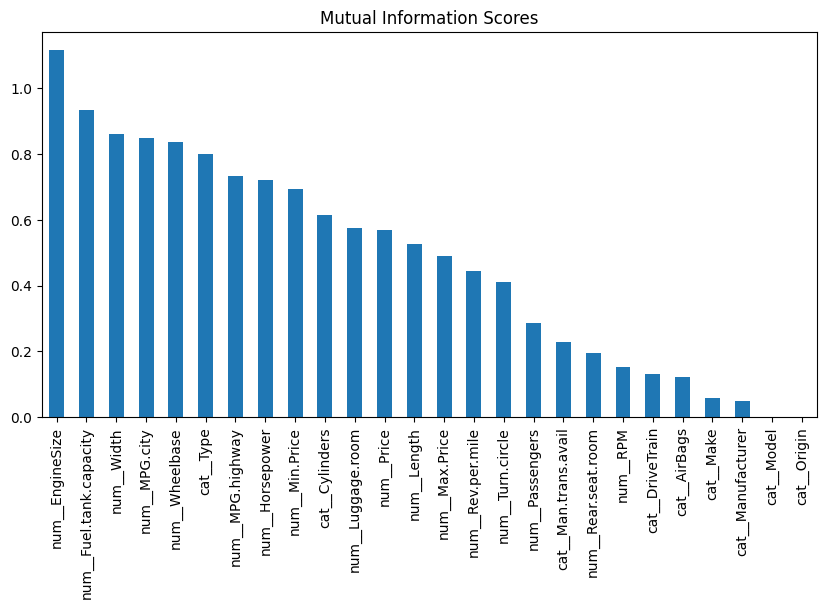

In [19]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(10, 5))

Select 5 features

In [20]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_regression, k=13)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MPG.city', 'num__EngineSize', 'num__Fuel.tank.capacity',
       'num__Wheelbase', 'num__Width'], dtype=object)

Get the original coulumn names

In [21]:
sel_cols[0].split('__')

['num', 'MPG.city']

In [22]:
sel_cols[0].split('__')[1]

'MPG.city'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['MPG.city', 'EngineSize', 'Fuel.tank.capacity', 'Wheelbase', 'Width']

In [25]:
X_imp = X[imp_cols]
X_imp

,MPG.city,EngineSize,Fuel.tank.capacity,Wheelbase,Width
0,25,1.8,13.2,102,68
1,18,3.2,18.0,115,71
2,20,2.8,16.9,102,67
3,19,2.8,21.1,106,70
4,22,3.5,21.1,109,69
...,...,...,...,...,...
88,17,2.5,21.1,115,72
89,21,2.0,18.5,103,67
90,18,2.8,18.5,97,66
91,21,2.3,15.8,104,67


Seperate cat and con from the selected columns

In [26]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [27]:
cat_sel

[]

In [28]:
con_sel

['MPG.city', 'EngineSize', 'Fuel.tank.capacity', 'Wheelbase', 'Width']

Create a final preprocessing pipeline

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [31]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [32]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [33]:
X_sel_pre = pre2.fit_transform(X_imp)
X_sel_pre.head()

,num__MPG.city,num__EngineSize,num__Fuel.tank.capacity,num__Wheelbase,num__Width
0,0.471312,-0.841022,-1.062184,-0.286932,-0.366184
1,-0.781032,0.515869,0.409445,1.629649,0.431983
2,-0.423219,0.128186,0.072197,-0.286932,-0.632239
3,-0.602126,0.128186,1.359872,0.302785,0.165927
4,-0.065407,0.806631,1.359872,0.745073,-0.100128


Apply train test split for X_sel_pre

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [35]:
xtrain.shape

(74, 5)

In [36]:
xtest.shape

(19, 5)

Create a linear regression

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

check r2 score in training and testing

In [38]:
model.score(xtrain,ytrain)

0.9432103225552912

Predict train and test data

In [39]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [40]:
ypred_tr[0:5]

array([[2989.71448686],
       [2585.81848838],
       [3395.38006115],
       [3598.69897959],
       [4001.15454175]])

In [41]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [42]:
ypred_ts[0:5]

array([[2627.27432056],
       [3581.13712264],
       [2992.26163512],
       [3341.59570515],
       [4160.30711996]])

In [43]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


Evaluating model on test

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [45]:
ts_mse = mean_squared_error(ytest,ypred_ts)
ts_mse

44610.023424812025

In [46]:
ts_rmse = ts_mse**(1/2)
ts_rmse

211.21085063228173

In [47]:
ts_mae = mean_absolute_error(ytest,ypred_ts)
ts_mae

153.98897580119467

In [48]:
ts_r2 = r2_score(ytest,ypred_ts)
ts_r2

0.8770046920243761

Predict results for out of sample data

In [49]:
xnew = pd.read_csv('sample.csv')
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,NaN,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,NaN,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,NaN,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [50]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MPG.city', 'EngineSize',
                                  'Fuel.tank.capacity', 'Wheelbase', 'Width']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

Apply pre.transform on out of sample data

In [51]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MPG.city,num__EngineSize,num__Fuel.tank.capacity,num__Wheelbase,num__Width
0,-0.602126,0.128186,1.359872,0.302785,-1.164350
1,0.113500,-0.647181,-0.449005,-0.434362,-0.898295
2,-0.244313,-0.453339,-0.050439,0.597644,0.431983
3,-0.959938,-1.325626,1.022624,-1.171509,-0.100128
4,0.471312,-0.841022,-1.307455,-1.613797,-1.696461


Predict the results and probability

In [52]:
preds = model.predict(xnew_pre)
preds

array([[3363.93609282],
       [2783.83228751],
       [3186.04597177],
       [2914.27881674],
       [2302.06882363]])

Saveabove results to dataframe

In [53]:
xnew['Weight_pred']=preds

In [54]:
xnew.to_csv('Results.csv', index=False)